importing modules

In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import mnist 
from keras.datasets import cifar10
import time
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

data manipulation

In [2]:
gpus = tf.config.list_physical_devices('CPU')

if gpus:
    print("Using GPU")
else:
    print("No GPU found, using CPU")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.mean(axis=3)
x_test = x_test.mean(axis=3)

x_train = x_train.reshape(-1, 32 * 32)
x_test = x_test.reshape(-1, 32 * 32)

data= np.concatenate((x_train, x_test), axis=0)



mean= data.mean(axis=0)
std = data.std(axis=0)


x_train = (x_train - mean) / std
x_test = (x_test - mean) / std






Using GPU


creating and intializing the netwok model 1

In [8]:
model = models.Sequential(
    [
        layers.Input(shape=(1024)),
        layers.Dense(300, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
    ]
)

model.compile(
    optimizer='adam', 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)

model.summary()

history_1 = model.fit(x_train, y_train, epochs=500, batch_size=3000, validation_split=0.5)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               307500    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 310,510
Trainable params: 310,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
9/9 [==============================] - 1s 54ms/step - loss: 2.9100 - accuracy: 0.2187 - val_loss: 2.5638 - val_accuracy: 0.2779
Epoch 2/500
9/9 [==============================] - 0s 25ms/step - loss: 2.4692 - accuracy: 0.3090 - val_loss: 2.4259 - val_accuracy: 0.3163
Epoch 3/500
9/9 [==============================] - 0s 23ms/step - loss: 2.3196 - accuracy: 0.3544 - val_loss: 2.3594 - val_accuracy: 0.3314
Epoch 4/500
9/9 [=======

evaluating model 1

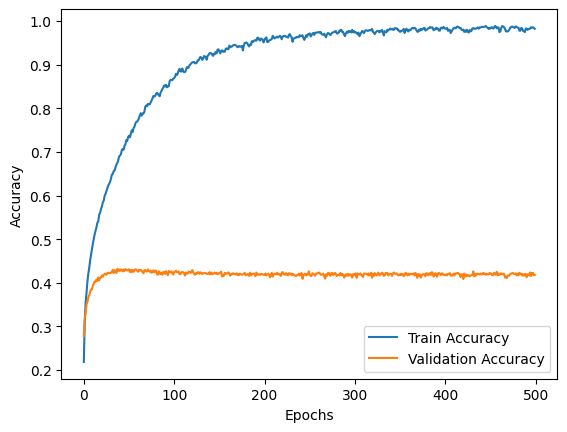

313/313 [==============================] - 1s 3ms/step - loss: 2.5250 - accuracy: 0.4169
Test Loss: 2.5249502658843994
Test Accuracy: 0.41690000891685486


In [9]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')